# PlotArt

I'm gonna try some stuff for the matplotlib art exhibition. I'm choosing polar plots because I want to draw a mandala!

I'll start with the function 

$$r = sin(3\theta)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

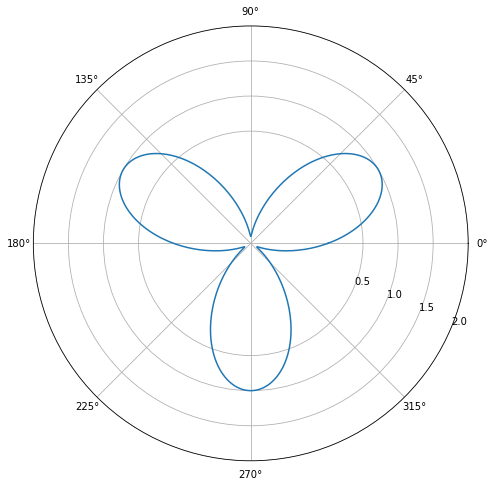

In [2]:
# Polar plot

theta = np.linspace(0, 2 * np.pi, 400)
r = np.sin(3*theta)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))

ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

This gives me three lobes. Instead of $k=3$, let's try for other values of k in the equation

$$r = sin(k\theta)$$


In [3]:
# creating a function to plot a function given lobe size, phase and scaling factor s

def plot_base_fn(s,k,phase):
    
    theta = np.linspace(0, 2 * np.pi, 400)
    r = s*np.sin(k*theta + phase)
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))
    ax.plot(theta, r)
    ax.set_rmax(2)
    ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks

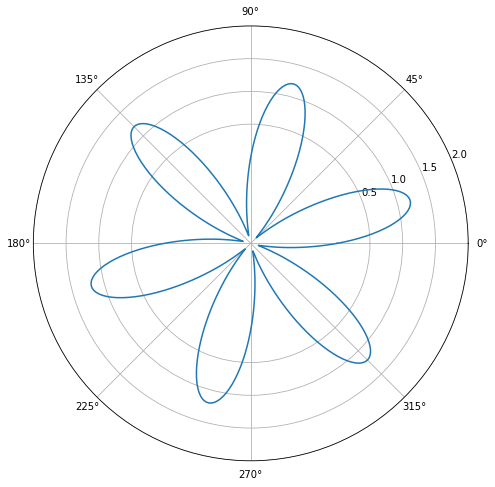

In [4]:
plot_base_fn(1.2,6,0)

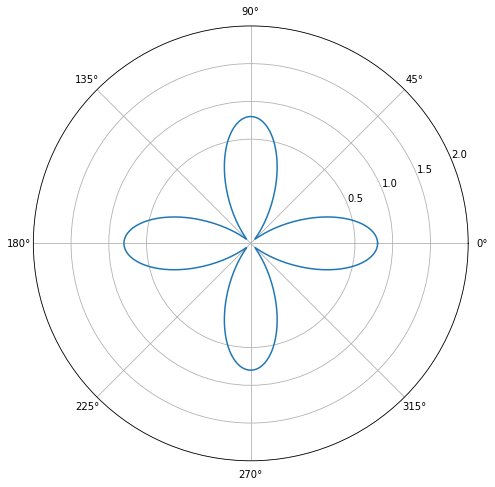

In [5]:
plot_base_fn(0.8,4,np.pi/2)

Now, I want to plot multiples of these functions. For that, I'll create a seperate function and a plotter.

The function is of the form:

$$r = Asin(k\theta +\phi)$$

where I varied A, $\theta$ and $\phi$ and overlayed multiple plots with a color gradient

In [6]:
# The basic function for making the curve

def sinusoid_lobes(theta,s,k,phase):
    
    return s*np.sin(k*(theta + phase))

# A function to take in an array of parameter values and plot the sinusoids on a single plot

def plot_sinusoids(params_list):
    
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))
    thetas = np.linspace(0, 2 * np.pi, 400)
    
    for params in params_list:
        
        s = params[0]
        k = params[1]
        phase = params[2]
        ax.plot(thetas,sinusoid_lobes(thetas, s, k, phase))
        
    
    # set the range of the axes
    ax.set_rmax(2)
    ax.set_rmin(0)

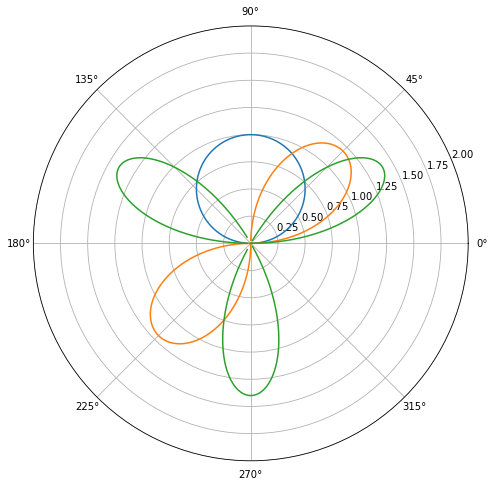

In [7]:
plot_sinusoids([[1,1,0],[1.2,2,0],[1.4,3,0]])

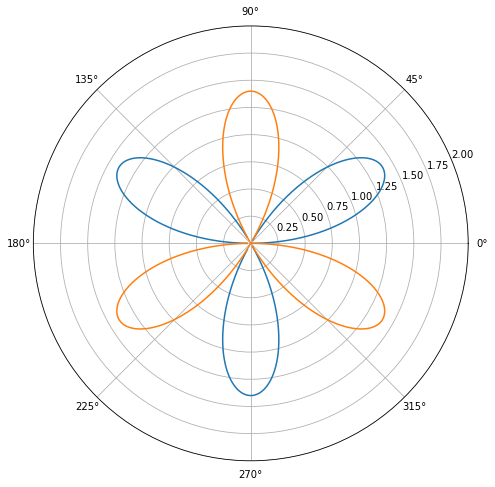

In [8]:
plot_sinusoids([[1.4,3,0],[1.4,3,np.pi/3]])

In [9]:
n = 100
k = 3
params_array = np.zeros([n,3])
scalings = np.linspace(0.1,2,n)
phases = np.linspace(0,2*np.pi,n)

params_array[:,0] = scalings
params_array[:,1] = k
params_array[:,2] = phases

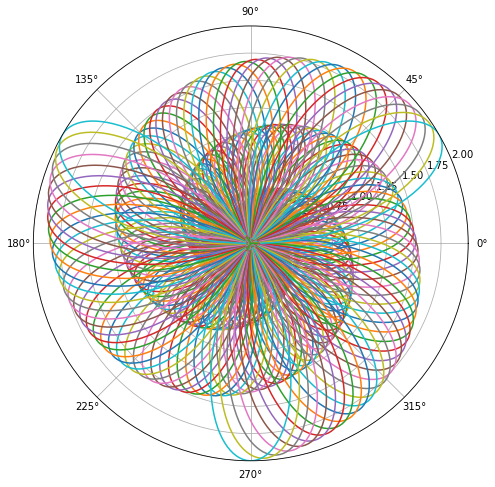

In [10]:
plot_sinusoids(params_array)

Pretty neat huh? Let's change up the color scheme a bit. I'm redefining the sinusoids function. I'm using a color gradient function created by Brendan Artley found [here](https://medium.com/@BrendanArtley/matplotlib-color-gradients-21374910584b)

In [13]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

Now, we create an array with color values as well

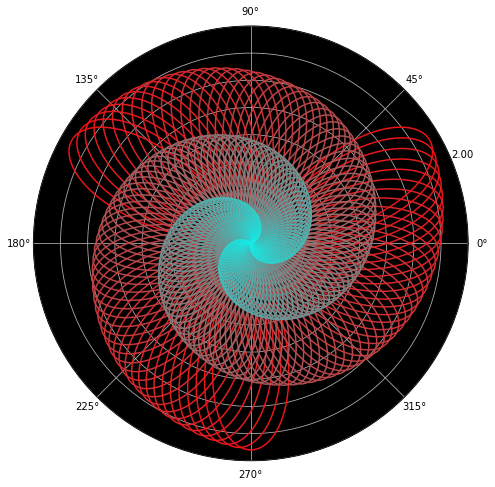

In [116]:
n = 100
k = 3

colors = get_color_gradient('#ED1217','#12EDE8',n)

def plot_sinusoids_nice_color(n, params_list, colors):
    
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))
    thetas = np.linspace(0, 2 * np.pi, 400)
    
    for i in range(n):
        
        s = params_array[i][0]
        k = params_array[i][1]
        phase = params_array[i][2]
        ax.plot(thetas,sinusoid_lobes(thetas, s, k, phase), color=colors[i])
        ax.set_facecolor('black')
    
    # set the range of the axes
    ax.set_rmax(2)
    ax.set_rmin(0)
    

plot_sinusoids_nice_color(n, params_array,colors)

## Alright! Let's try and make it look continuous by plotting 1000 graphs!

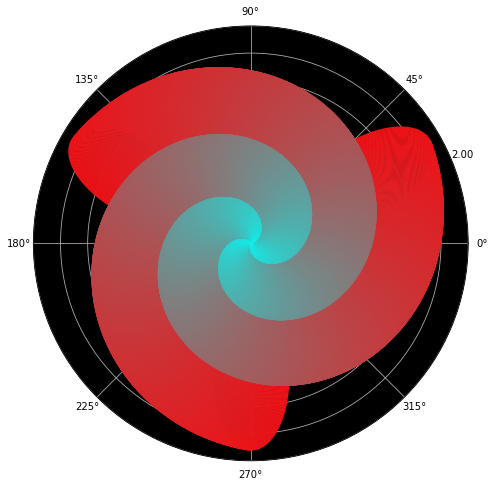

In [118]:
# different plot

n = 1000
k = 3
params_array = np.zeros([n,3])
scalings = 2-np.linspace(0.1,2,n)
phases = np.linspace(0,2*np.pi,n)
colors = get_color_gradient('#ED1217','#12EDE8',n)


params_array[:,0] = scalings
params_array[:,1] = k
params_array[:,2] = phases

plot_sinusoids_nice_color(n, params_array,colors)

Let's try and find a nice value of n,

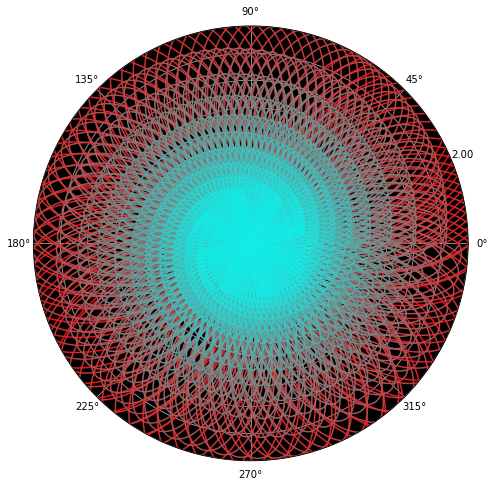

In [134]:
n = 200
ks = np.linspace(2,8,n)
params_array = np.zeros([n,3])
scalings = 2.5-np.linspace(0.1,2,n)
phases = np.linspace(0,2*np.pi,n)
colors = get_color_gradient('#ED1217','#12EDE8',n)


params_array[:,0] = scalings
params_array[:,1] = ks
params_array[:,2] = phases

plot_sinusoids_nice_color(n, params_array,colors)

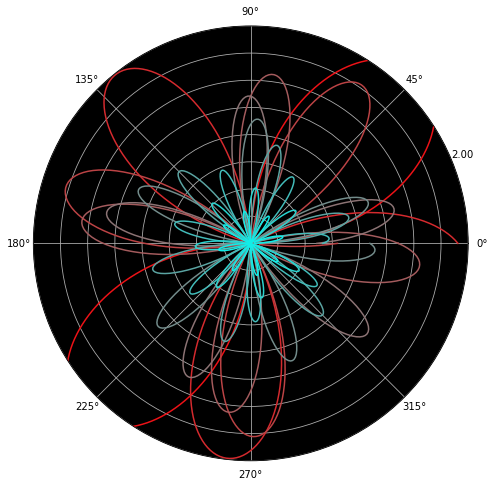

In [137]:
n = 10
ks = np.linspace(2,8,n)
params_array = np.zeros([n,3])
scalings = 2.3-np.linspace(0.1,2,n)
phases = np.linspace(0,2*np.pi,n)
colors = get_color_gradient('#ED1217','#12EDE8',n)


params_array[:,0] = scalings
params_array[:,1] = ks
params_array[:,2] = phases

plot_sinusoids_nice_color(n, params_array,colors)

Lower N values look very nice. We can try filling the curves. Let's define a new function now. I played around with the colors a bit.

In [72]:
def plot_sinusoids_filled(n, params_list, colors):
    
    fig1, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(12,12))
    thetas = np.linspace(0, 6 * np.pi, 1200)
    
    for i in range(n):
        
        s = params_array[i][0]
        k = params_array[i][1]
        phase = params_array[i][2]
        ax.fill_between(thetas,sinusoid_lobes(thetas, s, k, phase), color=colors[i], edgecolor='black')
        ax.set_facecolor('black')
    
    # set the range of the axes
    ax.set_rmax(1.9)
    ax.set_rmin(0)
    ax.set_rticks([])
    ax.grid(False)
    
    # Save Figure
    
    fig1.savefig('plotart.png')
    
    
    

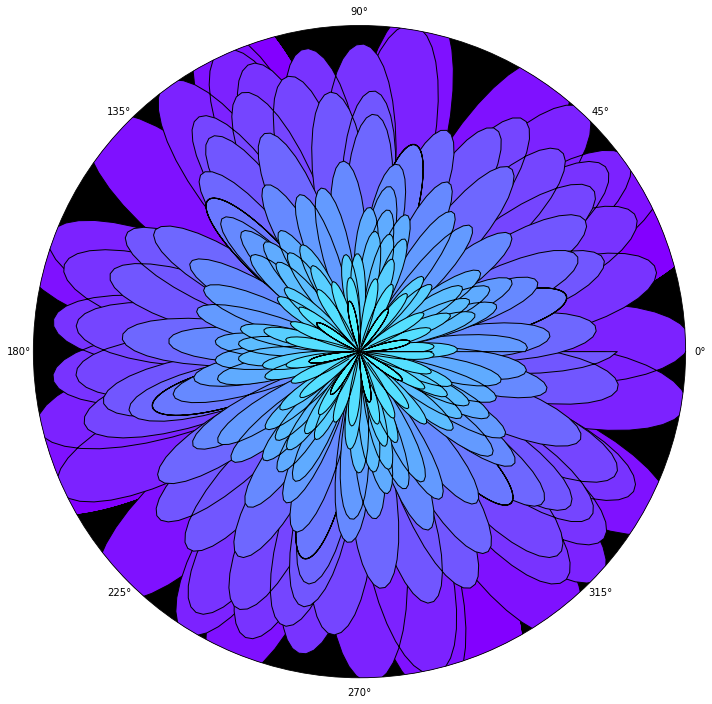

In [31]:
n = 15
ks = np.linspace(4,8,n)
params_array = np.zeros([n,3])
scalings = 2.3-np.linspace(0.1,2,n)
phases = np.linspace(0,2*np.pi,n)
colors = get_color_gradient('#8300FF','#51f0ff',n)


params_array[:,0] = scalings
params_array[:,1] = ks
params_array[:,2] = phases

plot_sinusoids_filled(n, params_array,colors)

Nice! That looks cool. Let's play with the values and colors a bit more

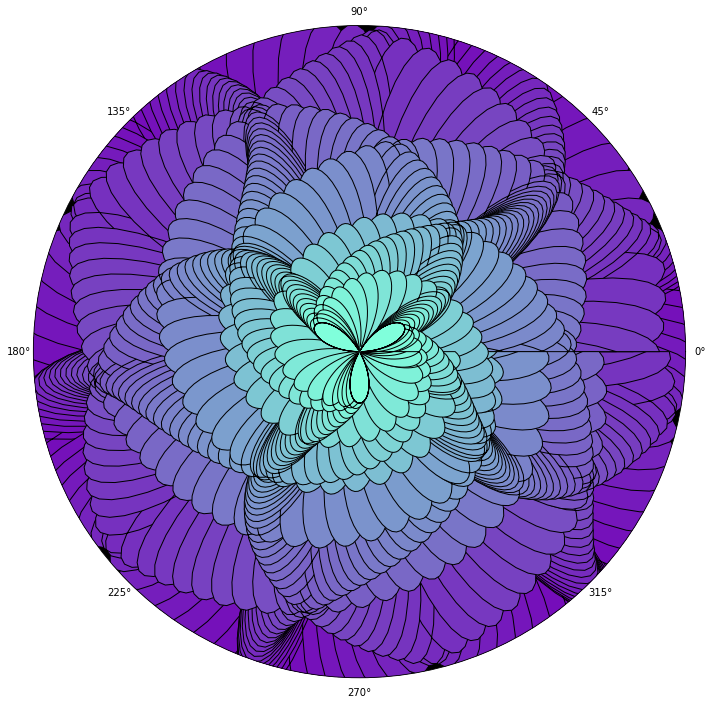

In [58]:
n = 60
ks = np.linspace(6,3,n)
params_array = np.zeros([n,3])
scalings = 2.3-np.linspace(0.1,2,n)
phases = np.linspace(0,2*np.pi,n)

#colors = get_color_gradient('#8300FF','#51f0ff',n)
# Earth
#colors = get_color_gradient('#347928','#C0EBA6',n)
# Fire
#colors = get_color_gradient('#ff5a00','#ffe808',n)
# Violet-blue
colors = get_color_gradient('#7400b8','#80ffdb',n)


params_array[:,0] = scalings
params_array[:,1] = ks
params_array[:,2] = phases

plot_sinusoids_filled(n, params_array,colors)

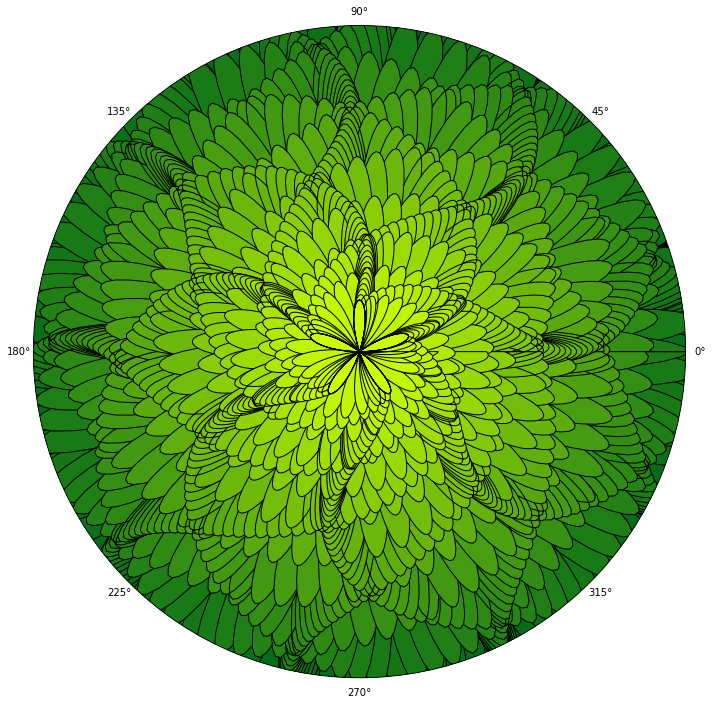

In [73]:
n = 60
ks = np.linspace(10,5,n)
params_array = np.zeros([n,3])
scalings = 2.3-np.linspace(0.1,2,n)
phases = np.linspace(0,2*np.pi,n)

# color palette choices

colors = get_color_gradient('#00671a','#ccff00',n)

# Fire
#colors = get_color_gradient('#ff5a00','#ffe808',n)

# Violet-blue
#colors = get_color_gradient('#7400b8','#80ffdb',n)


params_array[:,0] = scalings
params_array[:,1] = ks
params_array[:,2] = phases

plot_sinusoids_filled(n, params_array,colors)

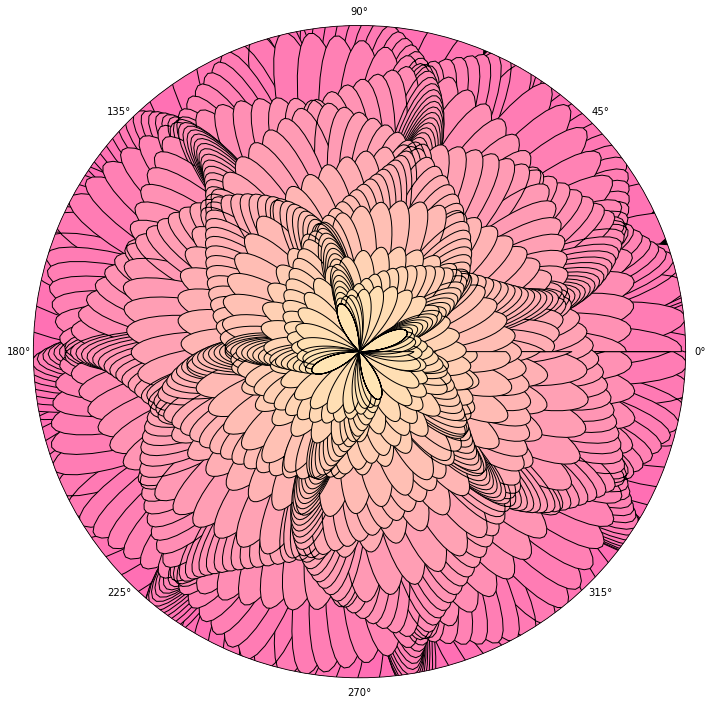

In [93]:
n = 60
ks = np.linspace(8,4,n)
params_array = np.zeros([n,3])
scalings = 2.3-np.linspace(0.1,2,n)
phases = np.linspace(0,2*np.pi,n)

# color palette choices

# Flower
colors = get_color_gradient('#FF69B4','#FFE5B4',n)

# Fire
#colors = get_color_gradient('#ff5a00','#ffe808',n)

# Violet-blue
#colors = get_color_gradient('#7400b8','#80ffdb',n)


params_array[:,0] = scalings
params_array[:,1] = ks
params_array[:,2] = phases

plot_sinusoids_filled(n, params_array,colors)